In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
inputs = df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis='columns')
inputs.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [5]:
target = inputs['Survived'].copy()

In [6]:
inputs.drop('Survived', axis='columns', inplace=True)

In [11]:
sex_le = LabelEncoder()
inputs['Sex_n'] = sex_le.fit_transform(inputs['Sex'])

In [12]:
inputs.drop('Sex', axis='columns', inplace=True)

In [13]:
inputs.isnull().sum()

Pclass    0
Age       0
Fare      0
Sex_n     0
dtype: int64

In [14]:
inputs['Age'] = inputs['Age'].median()

In [15]:
classifier = DecisionTreeClassifier()
classifier.fit(inputs, target)

DecisionTreeClassifier()

In [16]:
inputs.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_n'], dtype='object')

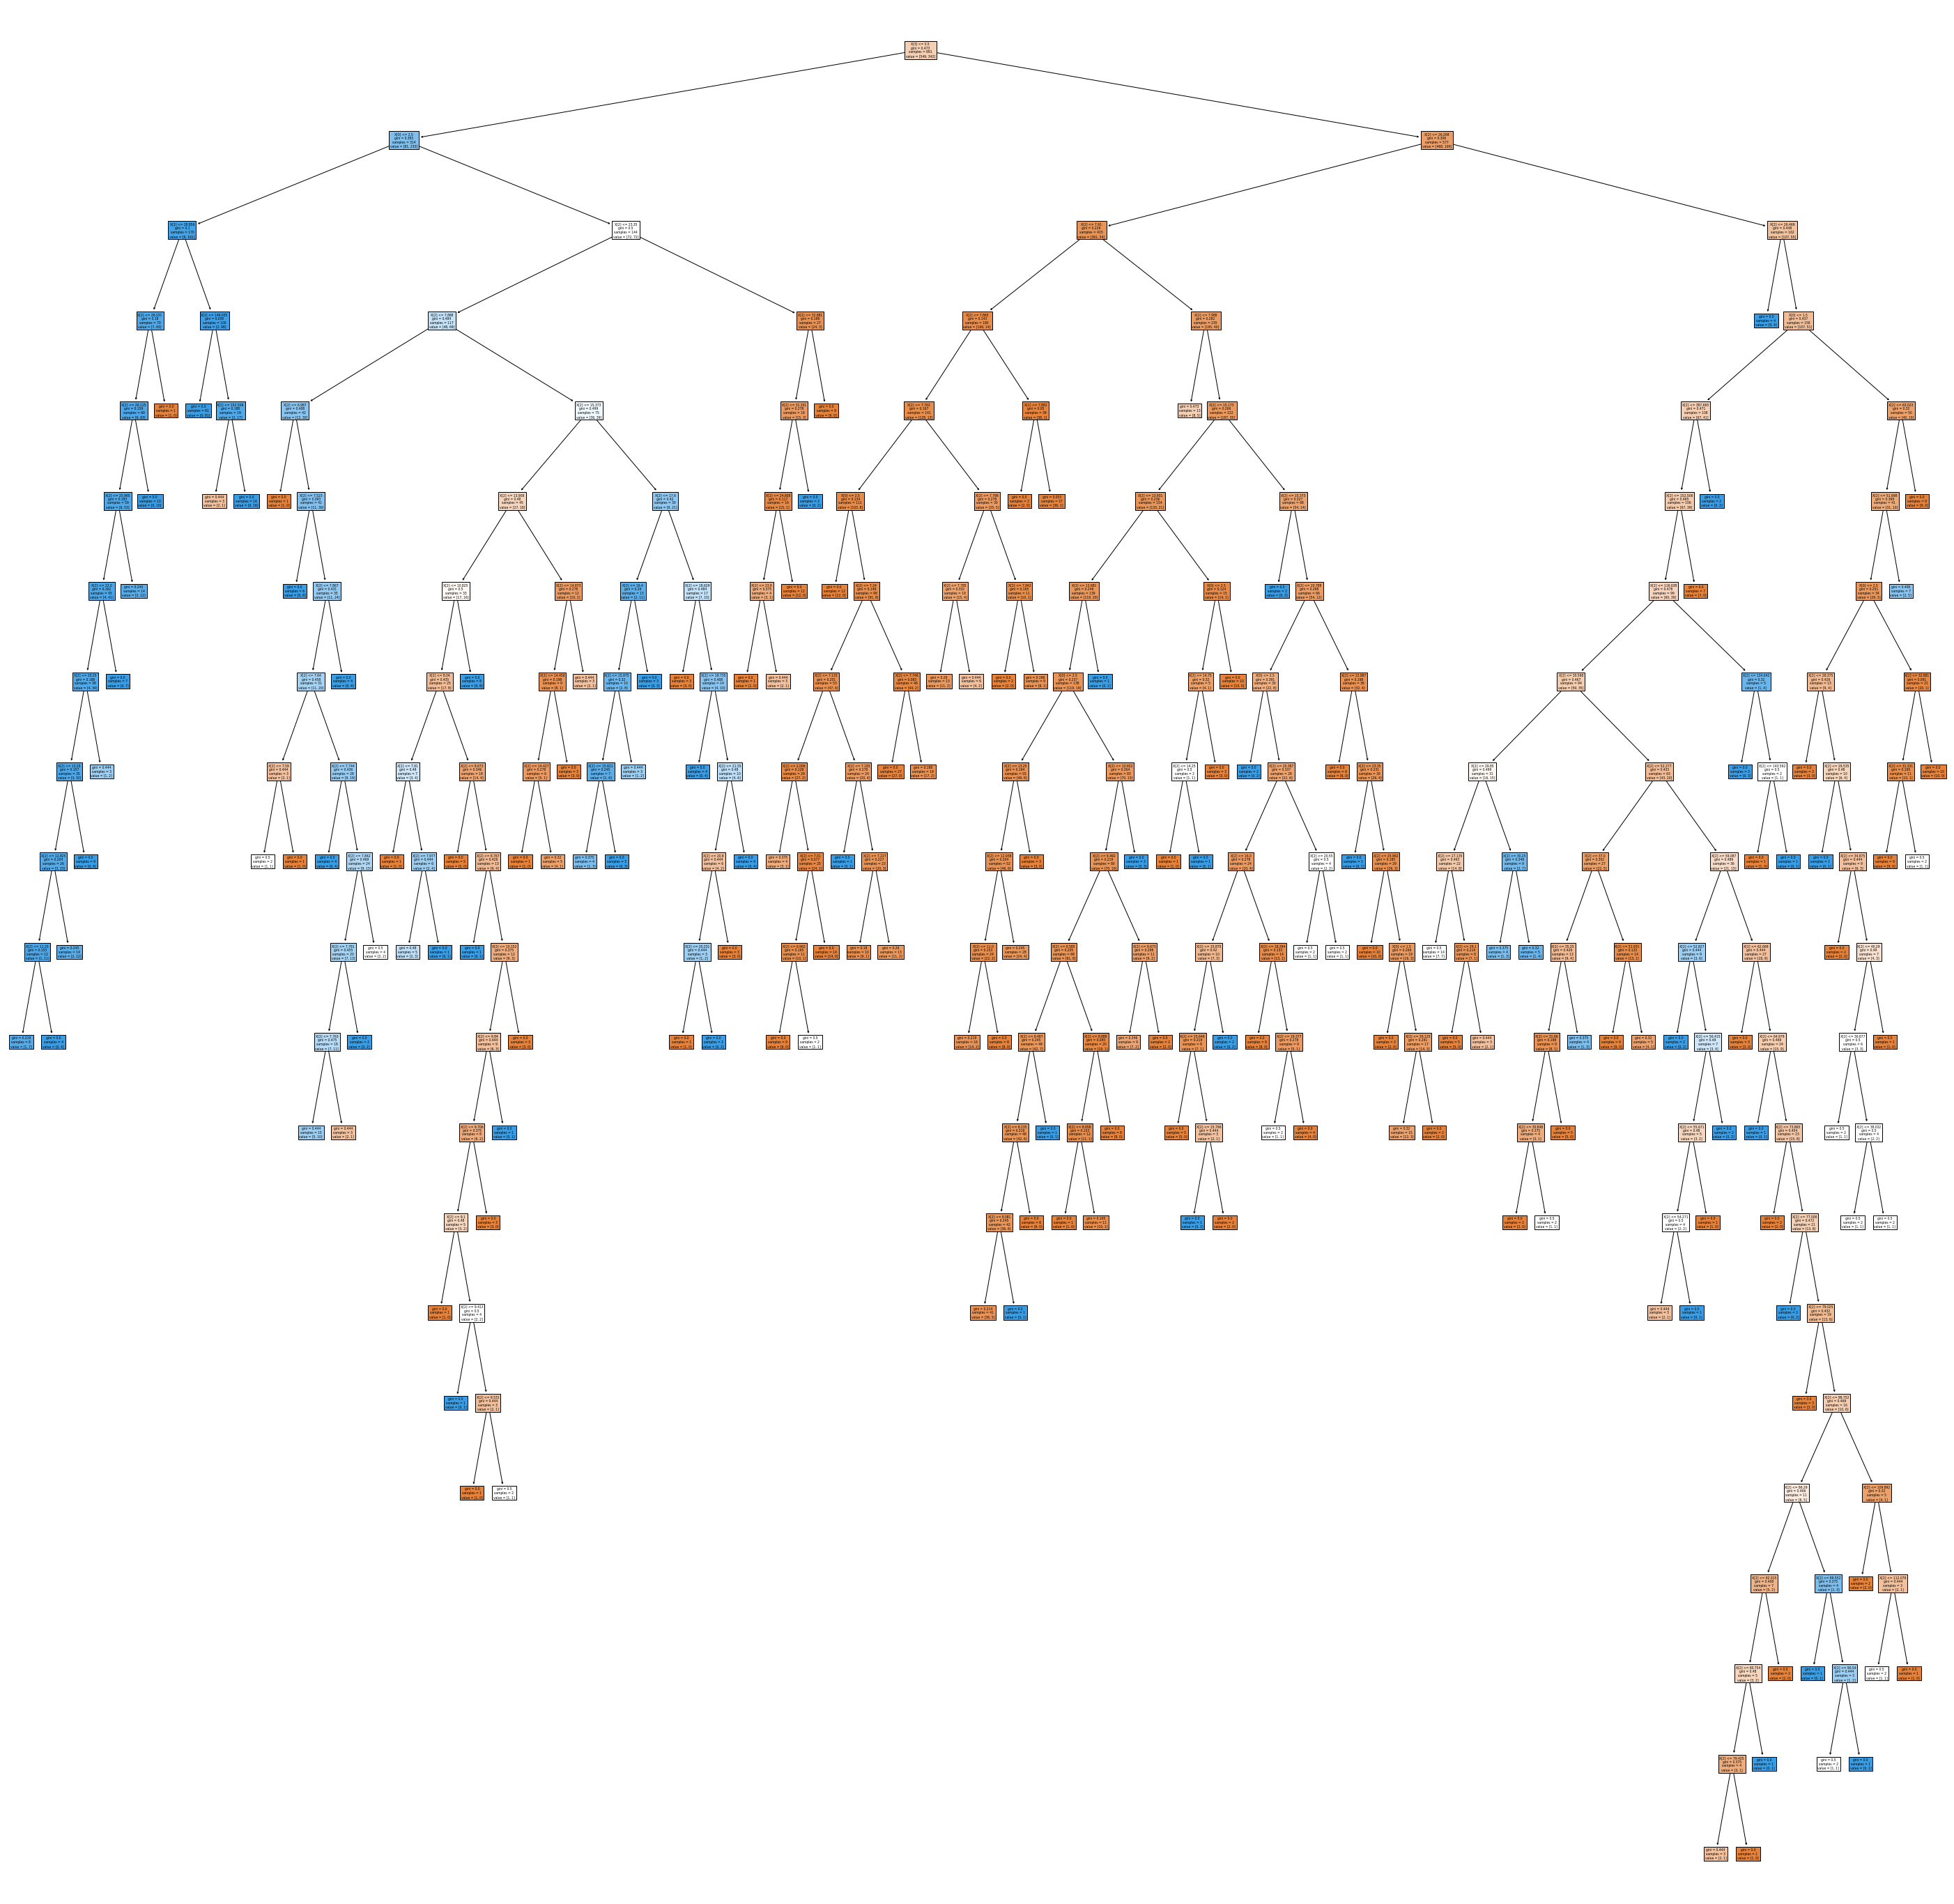

In [17]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(classifier,
                   filled=True)